# Iowa Housing ML Project
## by Ramzi Abujamra

In [1]:
# ML imports

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import sklearn.model_selection as ms
from sklearn.model_selection import train_test_split,KFold,cross_val_score
from sklearn.metrics import mean_squared_error,accuracy_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import matplotlib.pyplot as plt
import matplotlib


In [2]:
# data wrangling
import numpy as np
import pandas as pd
import math
import random
# statistics
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
# machine learning
from sklearn import datasets, tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split, KFold, StratifiedKFold, cross_val_score 
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix
# ploting
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
## Settings
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
pd.set_option('display.max_columns', None)  
pd.set_option('display.min_rows', 1) # combined with max_rows to show all rows 
pd.set_option('display.max_rows', None) 
pd.options.display.float_format = '{:.2f}'.format

In [221]:
## read in csv
data = pd.read_csv('data/processed_data.csv')

In [230]:
# Split back into train/test

train = data.iloc[:1460,]
test = data.iloc[1460:,]
print(train.shape)
print(test.shape)

(1460, 204)
(1459, 204)


In [223]:
data.head()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,ExterQual_num,ExterCond_num,BsmtQual_num,BsmtCond_num,HeatingQC_num,KitchenQual_num,FireplaceQu_num,GarageQual_num,GarageCond_num,PoolQC_num,GarageFinish_num,LandSlope_num,BsmtFinType1_num,BsmtFinType2_num,BsmtExposure_num,House_Age,RemodAdd_Age,Garage_Age,YrSold_Age,LogPrice,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_None,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Other,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Condition1_Feedr,Condition1_Norm,Condition1_Other,Condition1_PosN,Condition1_RRAn,Condition2_Norm,Condition2_Other,Condition2_PosN,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_BrkFace,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Other,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_BrkFace,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.00,8450,7,5,196.00,706.00,0.00,150.00,856.00,856,854,0,1710,1.00,0.00,2,1,3,1,8,0,2.00,548.00,0,61,0,0,0,0,0,2,208500.00,4,3,4,3,5,4,0,3,3,0,2,3,6,1,0,17,17,17.00,12,12.25,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,80.00,9600,6,8,0.00,978.00,0.00,284.00,1262.00,1262,0,0,1262,0.00,1.00,2,0,3,1,6,1,2.00,460.00,298,0,0,0,0,0,0,5,181500.00,3,3,4,3,5,3,3,3,3,0,2,3,5,1,3,44,44,44.00,13,12.11,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,

## Outliers 

In [125]:
Q1 = train.quantile(0.25)
Q3 = train.quantile(0.75)
IQR = Q3 - Q1
print(Q1)

LotFrontage                 60.00
LotArea                   7553.50
OverallQual                  5.00
OverallCond                  5.00
MasVnrArea                   0.00
BsmtFinSF1                   0.00
BsmtFinSF2                   0.00
BsmtUnfSF                  223.00
TotalBsmtSF                795.75
1stFlrSF                   882.00
2ndFlrSF                     0.00
LowQualFinSF                 0.00
GrLivArea                 1129.50
BsmtFullBath                 0.00
BsmtHalfBath                 0.00
FullBath                     1.00
HalfBath                     0.00
BedroomAbvGr                 2.00
KitchenAbvGr                 1.00
TotRmsAbvGrd                 5.00
Fireplaces                   0.00
GarageCars                   1.00
GarageArea                 334.50
WoodDeckSF                   0.00
OpenPorchSF                  0.00
EnclosedPorch                0.00
3SsnPorch                    0.00
ScreenPorch                  0.00
PoolArea                     0.00
MiscVal       

In [124]:
print(data.shape)
df_out = train[~((train < (Q1 - 1.5 * IQR)) |(train > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df_out.shape)

(2919, 204)
(0, 204)


## Modeling

In [231]:
# Drop SalePrice and LogPrice from test

test.drop(['LogPrice','SalePrice'],axis=1,inplace=True)
test.shape

(1459, 202)

In [232]:
# Split train into X and Y

x_train = train.drop(['LogPrice','SalePrice'], axis=1)
y_train = train['LogPrice']

## Standardization

In [227]:
from sklearn.preprocessing import StandardScaler 

scaler = StandardScaler() 

In [234]:
cols = x_train.columns.tolist()
x_train[cols] = scaler.fit_transform(x_train[cols])
test[cols] = scaler.fit_transform(test[cols])

x_train.head()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,ExterQual_num,ExterCond_num,BsmtQual_num,BsmtCond_num,HeatingQC_num,KitchenQual_num,FireplaceQu_num,GarageQual_num,GarageCond_num,PoolQC_num,GarageFinish_num,LandSlope_num,BsmtFinType1_num,BsmtFinType2_num,BsmtExposure_num,House_Age,RemodAdd_Age,Garage_Age,YrSold_Age,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_None,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Other,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Condition1_Feedr,Condition1_Norm,Condition1_Other,Condition1_PosN,Condition1_RRAn,Condition2_Norm,Condition2_Other,Condition2_PosN,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_BrkFace,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Other,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_BrkFace,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,-0.23,-0.21,0.65,-0.52,0.51,0.58,-0.29,-0.94,-0.46,-0.79,1.16,-0.12,0.37,1.11,-0.24,0.79,1.23,0.16,-0.21,0.91,-0.95,0.31,0.35,-0.75,0.22,-0.36,-0.12,-0.27,-0.07,-0.09,-1.60,1.05,-0.24,0.58,0.12,0.89,0.74,-1.01,0.26,0.27,-0.07,0.32,0.23,1.16,-0.28,-0.63,-1.05,-0.88,-1.03,-0.14,0.00,-0.21,-0.08,-0.14,-0.76,-0.22,-0.05,-0.09,-0.33,1.97,-0.21,-0.11,-0.20,-0.12,-0.19,-0.22,-0.11,0.52,-0.42,0.06,0.26,-0.17,-0.17,-0.08,0.76,-0.19,-0.16,0.34,-0.03,-0.26,-0.18,-0.05,0.62,-0.14,2.96,-0.19,-0.27,-0.24,-0.16,-0.19,-0.43,-0.23,-0.17,-0.24,-0.29,-0.23,-0.13,-0.23,-0.21,-0.25,-0.13,-0.16,-0.24,0.40,-0.13,-0.11,-0.13,0.10,-0.07,-0.04,-0.15,-0.19,-0.17,-0.29,-0.10,-0.99,-0.07,-0.09,1.51,-0.16,-0.22,0.53,-0.09,-0.49,-0.07,-0.04,0.13,-0.03,-0.03,-0.03,-0.09,-0.06,-0.06,-0.19,-0.21,-0.42,-0.42,-0.07,-0.28,-0.13,1.35,-0.41,-0.13,-0.13,-0.21,-0.41,-0.41,-0.14,-0.33,-0.13,

## K-fold

In [235]:
kf = KFold(5, shuffle=True, random_state=42).get_n_splits(x_train.values)
#kf5 = KFold(n_splits = 5, shuffle = True, random_state = 4)

## 1. Lasso

In [236]:
## Gridsearch of Lasso
alphas = np.linspace(1e-5, 1e-2, 100)
params_lasso = [{'alpha':alphas, 'max_iter': [2000]}]

grid_lasso = GridSearchCV(estimator = Lasso(normalize=True), param_grid = params_lasso, cv = kf, 
                          scoring = 'neg_mean_squared_error', return_train_score = True, refit = True)
grid_lasso.fit(x_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=True, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'alpha': array([1.00000000e-05, 1.10909091e-04, 2.11818182e-04, 3.12727273e-04,
       4.13636364e-04,...
       8.48636364e-03, 8.58727273e-03, 8.68818182e-03, 8.78909091e-03,
       8.89000000e-03, 8.99090909e-03, 9.09181818e-03, 9.19272727e-03,
       9.29363636e-03, 9.39454545e-03, 9.49545455e-03, 9.59636364e-03,
       9.69727273e-03, 9.79818182e-03, 9.89909091e-03, 1.00000000e-02]),
                          'max_iter': [2000]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_squared_error', verbose=0)

In [237]:
model_lasso = grid_lasso.best_estimator_
print("Lasso best parameters are", grid_lasso.best_params_)
print("Lasso best train score is", round(model_lasso.score(x_train, y_train), ndigits=4))
print("Lasso best alpha is", round(grid_lasso.best_params_['alpha'], ndigits=5))
alpha_best_train = round(grid_lasso.best_params_['alpha'], ndigits=5)

Lasso best parameters are {'alpha': 0.00011090909090909092, 'max_iter': 2000}
Lasso best train score is 0.9095
Lasso best alpha is 0.00011


In [238]:
# Lasso model error: MSE & RMSE
ytrain_lasso = model_lasso.predict(x_train)
ytest_lasso = model_lasso.predict(test)

MSE = round(mean_squared_error(y_train, ytrain_lasso), ndigits=4)
RMSE = round(np.sqrt(mean_squared_error(y_train, ytrain_lasso)), ndigits = 4) # no written function, need to manually calculate
print("Train RMSE is", RMSE)

Train RMSE is 0.1201


In [239]:
lasso_score = np.sqrt(-cross_val_score(model_lasso, x_train, y_train, scoring = 'neg_mean_squared_error', cv = kf).mean())
print("validation RMSE: ", round(lasso_score, ndigits = 4))
lasso_score_r2 = cross_val_score(model_lasso, x_train, y_train, cv = kf).mean()
print("validation R2: ", round(lasso_score_r2, ndigits = 4))

validation RMSE:  0.1451
validation R2:  0.8677


RMSE Min: 0.1426
Optimal Lambda: 0.0001233


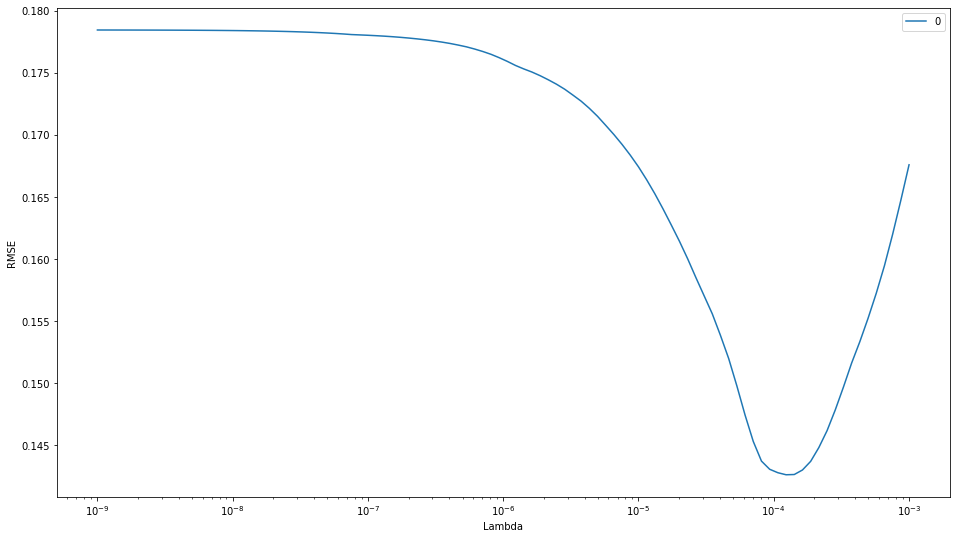

In [240]:
matplotlib.rcParams['figure.figsize'] = (16, 9)
test_error_mean=[]
parameter = {}
alphas_lasso = np.logspace(-9, -3, 100)

for i in alphas_lasso:
    lasso = Lasso(alpha = i, normalize=True)
    rmse = np.sqrt(-cross_val_score(lasso, x_train, y_train, scoring="neg_mean_squared_error", cv = kf))
    test_error_mean.append(np.mean(rmse))
    parameter[test_error_mean[-1]] = i

df_test_mean = pd.DataFrame(test_error_mean, index=alphas_lasso)
df_test_mean.plot(logx=True)
alpha_opt = parameter[min(parameter)]
plt.xlabel('Lambda')
plt.ylabel('RMSE')
print("RMSE Min:",round(min(parameter),4))
print("Optimal Lambda:", round(alpha_opt,7))

In [241]:
# Lasso coefficients of significant predictors
lasso_coef_abs = pd.DataFrame({'abs_coef':abs(model_lasso.coef_), 'coef': model_lasso.coef_}, index = x_train.columns).sort_values(by = 'abs_coef', ascending = False)
lasso_coef_imp = lasso_coef_abs[lasso_coef_abs['abs_coef']>0]
print(f"number of predictors before Lasso:", lasso_coef_abs.shape[0])
print(f"number of predictors after Lasso:", lasso_coef_imp.shape[0])
#lasso_coef_imp.to_csv("../output/lasso_coef_imp.csv") # coef is for raw data, not for normalized data
display(lasso_coef_imp)

number of predictors before Lasso: 202
number of predictors after Lasso: 82


,abs_coef,coef
GrLivArea,0.10,0.10
OverallQual,0.09,0.09
GarageCars,0.04,0.04
OverallCond,0.03,0.03
House_Age,0.02,-0.02
Neighborhood_NridgHt,0.02,0.02
Condition2_PosN,0.02,-0.02
BsmtFinType1_num,0.02,0.02
BsmtQual_num,0.02,0.02
BsmtFullBath,0.02,0.02


[Text(0.5, 0, 'Coefficients'),
 Text(0.5, 1.0, 'Top 20 Significant Predictors by Selected by Lasso')]

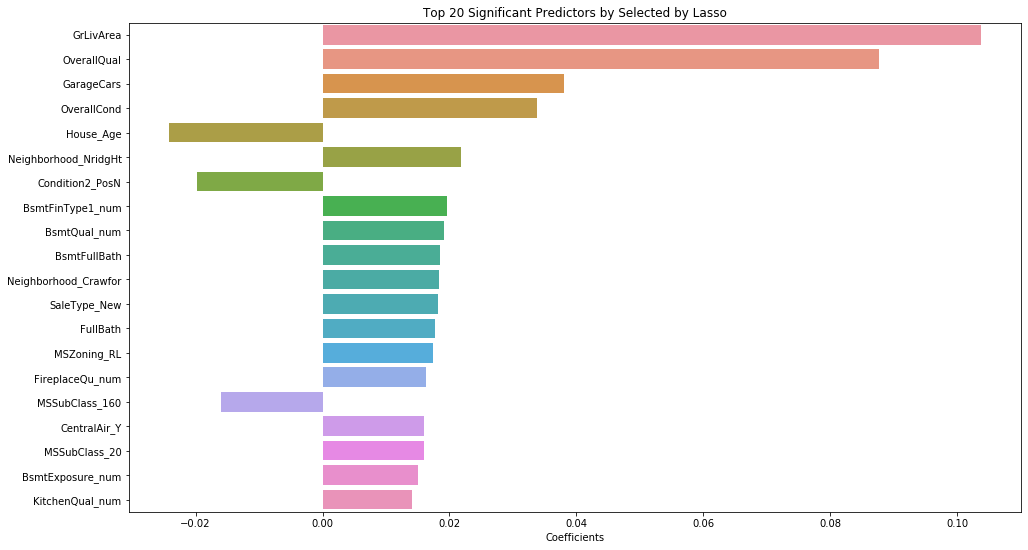

In [242]:
# plot of top significant coefficients
plot_df = lasso_coef_imp.iloc[:20, ]
ax = sns.barplot(y = plot_df.index, x = "coef", data = plot_df)
ax.set(xlabel = "Coefficients", title = "Top 20 Significant Predictors by Selected by Lasso")
#plt.savefig("../output/lasso_coef_imp_top20.png", bbox_inches = "tight")

## 2. Random Forest

In [243]:
# # parameter tuning for random forest
# params_rf = [{'max_features': range(20,51,10), 'n_estimators': range(200, 1001, 100), 
#               'max_depth': range(0,81,10), 'min_samples_leaf': range(10,31,5)}]
# kf5 = KFold(n_splits = 5, shuffle = True, random_state = 4)
# random_rf = RandomizedSearchCV(estimator=RandomForestRegressor(random_state=4, oob_score = True), 
#                                param_distributions = params_rf, return_train_score= True,
#                                n_iter = 100, cv = kf, verbose = 2, random_state=4)
# %time random_rf.fit(x_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] n_estimators=200, min_samples_leaf=10, max_features=50, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=200, min_samples_leaf=10, max_features=50, max_depth=10, total=   1.9s
[CV] n_estimators=200, min_samples_leaf=10, max_features=50, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s


[CV]  n_estimators=200, min_samples_leaf=10, max_features=50, max_depth=10, total=   1.8s
[CV] n_estimators=200, min_samples_leaf=10, max_features=50, max_depth=10 
[CV]  n_estimators=200, min_samples_leaf=10, max_features=50, max_depth=10, total=   1.9s
[CV] n_estimators=200, min_samples_leaf=10, max_features=50, max_depth=10 
[CV]  n_estimators=200, min_samples_leaf=10, max_features=50, max_depth=10, total=   2.0s
[CV] n_estimators=200, min_samples_leaf=10, max_features=50, max_depth=10 
[CV]  n_estimators=200, min_samples_leaf=10, max_features=50, max_depth=10, total=   3.3s
[CV] n_estimators=700, min_samples_leaf=30, max_features=20, max_depth=80 
[CV]  n_estimators=700, min_samples_leaf=30, max_features=20, max_depth=80, total=   2.4s
[CV] n_estimators=700, min_samples_leaf=30, max_features=20, max_depth=80 
[CV]  n_estimators=700, min_samples_leaf=30, max_features=20, max_depth=80, total=   1.6s
[CV] n_estimators=700, min_samples_leaf=30, max_features=20, max_depth=80 
[CV]  n_es

[CV]  n_estimators=900, min_samples_leaf=30, max_features=20, max_depth=10, total=   1.7s
[CV] n_estimators=900, min_samples_leaf=30, max_features=20, max_depth=10 
[CV]  n_estimators=900, min_samples_leaf=30, max_features=20, max_depth=10, total=   1.7s
[CV] n_estimators=900, min_samples_leaf=30, max_features=20, max_depth=10 
[CV]  n_estimators=900, min_samples_leaf=30, max_features=20, max_depth=10, total=   1.7s
[CV] n_estimators=900, min_samples_leaf=30, max_features=20, max_depth=10 
[CV]  n_estimators=900, min_samples_leaf=30, max_features=20, max_depth=10, total=   1.7s
[CV] n_estimators=900, min_samples_leaf=25, max_features=20, max_depth=60 
[CV]  n_estimators=900, min_samples_leaf=25, max_features=20, max_depth=60, total=   1.7s
[CV] n_estimators=900, min_samples_leaf=25, max_features=20, max_depth=60 
[CV]  n_estimators=900, min_samples_leaf=25, max_features=20, max_depth=60, total=   1.7s
[CV] n_estimators=900, min_samples_leaf=25, max_features=20, max_depth=60 
[CV]  n_es

[CV]  n_estimators=500, min_samples_leaf=25, max_features=20, max_depth=40, total=   1.1s
[CV] n_estimators=500, min_samples_leaf=25, max_features=20, max_depth=40 
[CV]  n_estimators=500, min_samples_leaf=25, max_features=20, max_depth=40, total=   1.1s
[CV] n_estimators=500, min_samples_leaf=25, max_features=20, max_depth=40 
[CV]  n_estimators=500, min_samples_leaf=25, max_features=20, max_depth=40, total=   1.1s
[CV] n_estimators=500, min_samples_leaf=25, max_features=20, max_depth=40 
[CV]  n_estimators=500, min_samples_leaf=25, max_features=20, max_depth=40, total=   1.0s
[CV] n_estimators=700, min_samples_leaf=15, max_features=30, max_depth=40 
[CV]  n_estimators=700, min_samples_leaf=15, max_features=30, max_depth=40, total=   1.8s
[CV] n_estimators=700, min_samples_leaf=15, max_features=30, max_depth=40 
[CV]  n_estimators=700, min_samples_leaf=15, max_features=30, max_depth=40, total=   1.8s
[CV] n_estimators=700, min_samples_leaf=15, max_features=30, max_depth=40 
[CV]  n_es

[CV]  n_estimators=500, min_samples_leaf=10, max_features=50, max_depth=80, total=   1.7s
[CV] n_estimators=500, min_samples_leaf=10, max_features=50, max_depth=80 
[CV]  n_estimators=500, min_samples_leaf=10, max_features=50, max_depth=80, total=   1.6s
[CV] n_estimators=500, min_samples_leaf=10, max_features=50, max_depth=80 
[CV]  n_estimators=500, min_samples_leaf=10, max_features=50, max_depth=80, total=   1.7s
[CV] n_estimators=500, min_samples_leaf=10, max_features=50, max_depth=80 
[CV]  n_estimators=500, min_samples_leaf=10, max_features=50, max_depth=80, total=   1.8s
[CV] n_estimators=200, min_samples_leaf=10, max_features=40, max_depth=30 
[CV]  n_estimators=200, min_samples_leaf=10, max_features=40, max_depth=30, total=   0.6s
[CV] n_estimators=200, min_samples_leaf=10, max_features=40, max_depth=30 
[CV]  n_estimators=200, min_samples_leaf=10, max_features=40, max_depth=30, total=   0.6s
[CV] n_estimators=200, min_samples_leaf=10, max_features=40, max_depth=30 
[CV]  n_es

[CV]  n_estimators=300, min_samples_leaf=20, max_features=40, max_depth=30, total=   0.8s
[CV] n_estimators=300, min_samples_leaf=20, max_features=40, max_depth=30 
[CV]  n_estimators=300, min_samples_leaf=20, max_features=40, max_depth=30, total=   0.8s
[CV] n_estimators=300, min_samples_leaf=20, max_features=40, max_depth=30 
[CV]  n_estimators=300, min_samples_leaf=20, max_features=40, max_depth=30, total=   0.8s
[CV] n_estimators=300, min_samples_leaf=20, max_features=40, max_depth=30 
[CV]  n_estimators=300, min_samples_leaf=20, max_features=40, max_depth=30, total=   0.8s
[CV] n_estimators=900, min_samples_leaf=30, max_features=50, max_depth=30 
[CV]  n_estimators=900, min_samples_leaf=30, max_features=50, max_depth=30, total=   2.3s
[CV] n_estimators=900, min_samples_leaf=30, max_features=50, max_depth=30 
[CV]  n_estimators=900, min_samples_leaf=30, max_features=50, max_depth=30, total=   2.5s
[CV] n_estimators=900, min_samples_leaf=30, max_features=50, max_depth=30 
[CV]  n_es

[CV]  n_estimators=700, min_samples_leaf=25, max_features=30, max_depth=30, total=   1.6s
[CV] n_estimators=700, min_samples_leaf=25, max_features=30, max_depth=30 
[CV]  n_estimators=700, min_samples_leaf=25, max_features=30, max_depth=30, total=   1.5s
[CV] n_estimators=700, min_samples_leaf=25, max_features=30, max_depth=30 
[CV]  n_estimators=700, min_samples_leaf=25, max_features=30, max_depth=30, total=   1.5s
[CV] n_estimators=700, min_samples_leaf=25, max_features=30, max_depth=30 
[CV]  n_estimators=700, min_samples_leaf=25, max_features=30, max_depth=30, total=   1.5s
[CV] n_estimators=500, min_samples_leaf=20, max_features=50, max_depth=30 
[CV]  n_estimators=500, min_samples_leaf=20, max_features=50, max_depth=30, total=   1.4s
[CV] n_estimators=500, min_samples_leaf=20, max_features=50, max_depth=30 
[CV]  n_estimators=500, min_samples_leaf=20, max_features=50, max_depth=30, total=   1.4s
[CV] n_estimators=500, min_samples_leaf=20, max_features=50, max_depth=30 
[CV]  n_es

[CV]  n_estimators=900, min_samples_leaf=10, max_features=40, max_depth=60, total=   2.6s
[CV] n_estimators=900, min_samples_leaf=10, max_features=40, max_depth=60 
[CV]  n_estimators=900, min_samples_leaf=10, max_features=40, max_depth=60, total=   3.2s
[CV] n_estimators=900, min_samples_leaf=10, max_features=40, max_depth=60 
[CV]  n_estimators=900, min_samples_leaf=10, max_features=40, max_depth=60, total=   2.6s
[CV] n_estimators=900, min_samples_leaf=10, max_features=40, max_depth=60 
[CV]  n_estimators=900, min_samples_leaf=10, max_features=40, max_depth=60, total=   3.2s
[CV] n_estimators=800, min_samples_leaf=15, max_features=20, max_depth=20 
[CV]  n_estimators=800, min_samples_leaf=15, max_features=20, max_depth=20, total=   1.8s
[CV] n_estimators=800, min_samples_leaf=15, max_features=20, max_depth=20 
[CV]  n_estimators=800, min_samples_leaf=15, max_features=20, max_depth=20, total=   1.7s
[CV] n_estimators=800, min_samples_leaf=15, max_features=20, max_depth=20 
[CV]  n_es

[CV]  n_estimators=400, min_samples_leaf=25, max_features=40, max_depth=30, total=   1.1s
[CV] n_estimators=400, min_samples_leaf=25, max_features=40, max_depth=30 
[CV]  n_estimators=400, min_samples_leaf=25, max_features=40, max_depth=30, total=   1.1s
[CV] n_estimators=400, min_samples_leaf=25, max_features=40, max_depth=30 
[CV]  n_estimators=400, min_samples_leaf=25, max_features=40, max_depth=30, total=   1.2s
[CV] n_estimators=400, min_samples_leaf=25, max_features=40, max_depth=30 
[CV]  n_estimators=400, min_samples_leaf=25, max_features=40, max_depth=30, total=   1.0s
[CV] n_estimators=1000, min_samples_leaf=20, max_features=50, max_depth=50 
[CV]  n_estimators=1000, min_samples_leaf=20, max_features=50, max_depth=50, total=   2.8s
[CV] n_estimators=1000, min_samples_leaf=20, max_features=50, max_depth=50 
[CV]  n_estimators=1000, min_samples_leaf=20, max_features=50, max_depth=50, total=   2.9s
[CV] n_estimators=1000, min_samples_leaf=20, max_features=50, max_depth=50 
[CV] 

[CV]  n_estimators=300, min_samples_leaf=20, max_features=30, max_depth=30, total=   0.8s
[CV] n_estimators=300, min_samples_leaf=20, max_features=30, max_depth=30 
[CV]  n_estimators=300, min_samples_leaf=20, max_features=30, max_depth=30, total=   0.8s
[CV] n_estimators=300, min_samples_leaf=20, max_features=30, max_depth=30 
[CV]  n_estimators=300, min_samples_leaf=20, max_features=30, max_depth=30, total=   0.8s
[CV] n_estimators=300, min_samples_leaf=20, max_features=30, max_depth=30 
[CV]  n_estimators=300, min_samples_leaf=20, max_features=30, max_depth=30, total=   0.8s
[CV] n_estimators=500, min_samples_leaf=25, max_features=20, max_depth=80 
[CV]  n_estimators=500, min_samples_leaf=25, max_features=20, max_depth=80, total=   1.2s
[CV] n_estimators=500, min_samples_leaf=25, max_features=20, max_depth=80 
[CV]  n_estimators=500, min_samples_leaf=25, max_features=20, max_depth=80, total=   1.0s
[CV] n_estimators=500, min_samples_leaf=25, max_features=20, max_depth=80 
[CV]  n_es

[CV]  n_estimators=600, min_samples_leaf=15, max_features=50, max_depth=70, total=   1.8s
[CV] n_estimators=600, min_samples_leaf=15, max_features=50, max_depth=70 
[CV]  n_estimators=600, min_samples_leaf=15, max_features=50, max_depth=70, total=   1.8s
[CV] n_estimators=600, min_samples_leaf=15, max_features=50, max_depth=70 
[CV]  n_estimators=600, min_samples_leaf=15, max_features=50, max_depth=70, total=   1.8s
[CV] n_estimators=600, min_samples_leaf=15, max_features=50, max_depth=70 
[CV]  n_estimators=600, min_samples_leaf=15, max_features=50, max_depth=70, total=   1.9s
[CV] n_estimators=400, min_samples_leaf=30, max_features=20, max_depth=30 
[CV]  n_estimators=400, min_samples_leaf=30, max_features=20, max_depth=30, total=   0.8s
[CV] n_estimators=400, min_samples_leaf=30, max_features=20, max_depth=30 
[CV]  n_estimators=400, min_samples_leaf=30, max_features=20, max_depth=30, total=   0.8s
[CV] n_estimators=400, min_samples_leaf=30, max_features=20, max_depth=30 
[CV]  n_es

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed: 12.4min finished


CPU times: user 12min 12s, sys: 6.89 s, total: 12min 19s
Wall time: 12min 25s


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [244]:
# print("Random Forest best parameters are\n", random_rf.best_params_)
# print("Random Forest best validation score is", round(random_rf.best_score_, ndigits=4)) # validation score
# print("Random Forest best training score is", round(random_rf.score(x_train, y_train), ndigits=4))
# print(random_rf.best_estimator_)
# model_rf = random_rf.best_estimator_

Random Forest best parameters are
 {'n_estimators': 500, 'min_samples_leaf': 10, 'max_features': 50, 'max_depth': 80}
Random Forest best validation score is 0.8611
Random Forest best training score is 0.9067
RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=80, max_features=50, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=10,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=None, oob_score=True,
                      random_state=4, verbose=0, warm_start=False)


In [245]:
## Best random forest model (based on CV)
model_rf = RandomForestRegressor(max_features= 50, n_estimators= 500, 
                                 max_depth= 80, min_samples_leaf= 10,
                                random_state=4, oob_score = True)

In [246]:
model_rf.fit(x_train, y_train)
randomforest_pred_train = model_rf.predict(x_train)
MSE = np.sqrt(-mean_squared_error(y_train, randomforest_pred_train))
print(f"RMSE is {RMSE}")
print("train score is", round(model_rf.score(x_train, y_train), ndigits = 4))
print("oob score is", round(model_rf.oob_score_, ndigits = 4))

RMSE is 0.1201
train score is 0.9067
oob score is 0.8634


In [247]:
rf_score = np.sqrt(-cross_val_score(model_rf, x_train, y_train, scoring = 'neg_mean_squared_error', cv = kf).mean())
print("validation RMSE: ", round(rf_score, ndigits = 4))
rf_score_r2 = cross_val_score(model_lasso, x_train, y_train, cv = kf).mean()
print("validation R2: ", round(rf_score_r2, ndigits = 4))

validation RMSE:  0.1488
validation R2:  0.8677


In [248]:
sorted_importance = sorted(zip(x_train.columns, model_rf.feature_importances_), key=lambda t:t[1], reverse=True)
rf_feature_imp = pd.DataFrame(sorted_importance, columns = ["predictor", "importance"]).sort_values(by = "importance", ascending=False)
#rf_feature_imp.to_csv("../output/rf_feature_imp.csv")
display(rf_feature_imp)

,predictor,importance
0,OverallQual,0.20
1,GrLivArea,0.14
2,ExterQual_num,0.10
3,KitchenQual_num,0.06
4,House_Age,0.05
5,TotalBsmtSF,0.04
6,GarageCars,0.04
7,GarageArea,0.04
8,BsmtQual_num,0.04
9,1stFlrSF,0.04


[Text(0.5, 0, 'Coefficients'),
 Text(0.5, 1.0, 'Top 20 Significant Predictors by Selected by RF')]

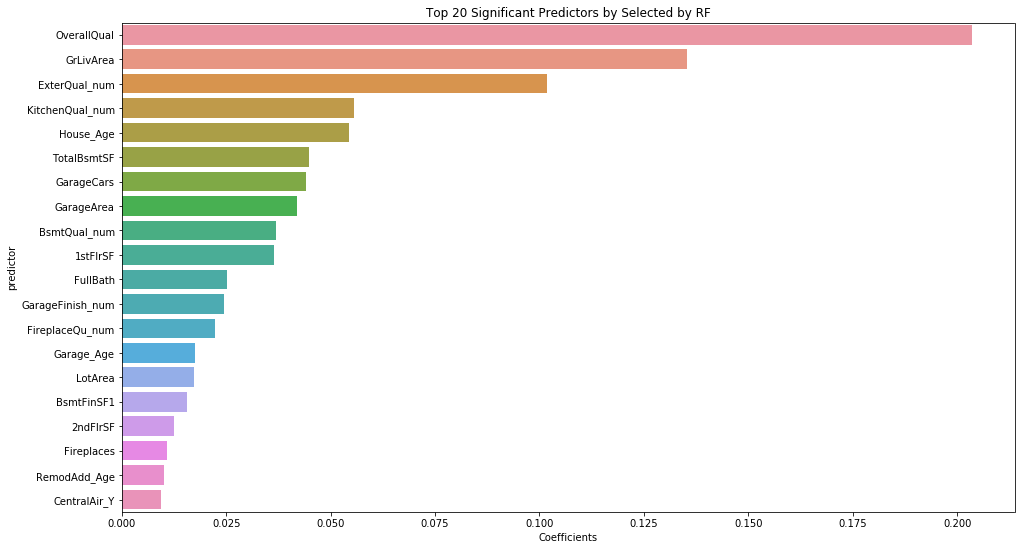

In [249]:
# plot of top significant coefficients
plot_df = rf_feature_imp.head(20)
ax = sns.barplot(y = plot_df.predictor, x = "importance", data = plot_df)
ax.set(xlabel = "Coefficients", title = "Top 20 Significant Predictors by Selected by RF")
#plt.savefig("../output/lasso_coef_imp_top20.png", bbox_inches = "tight")

## 3. GBM

In [250]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =42)

In [251]:
GBoost.fit(x_train, y_train)
gbm_pred_train = GBoost.predict(x_train)
MSE = np.sqrt(-mean_squared_error(y_train, gbm_pred_train))
print(f"RMSE is {RMSE}")
print("train score is", round(model_rf.score(x_train, y_train), ndigits = 4))
print("oob score is", round(model_rf.oob_score_, ndigits = 4))

RMSE is 0.1201
train score is 0.9067
oob score is 0.8634


In [252]:
gbm_score = np.sqrt(-cross_val_score(GBoost, x_train, y_train, scoring = 'neg_mean_squared_error', cv = kf).mean())
print("validation RMSE: ", round(gbm_score, ndigits = 4))
gbm_score_r2 = cross_val_score(GBoost, x_train, y_train, cv = kf).mean()
print("validation R2: ", round(gbm_score_r2, ndigits = 4))

validation RMSE:  0.1264
validation R2:  0.9002


In [253]:
sorted_importance = sorted(zip(x_train.columns, GBoost.feature_importances_), key=lambda t:t[1], reverse=True)
gbm_feature_imp = pd.DataFrame(sorted_importance, columns = ["predictor", "importance"]).sort_values(by = "importance", ascending=False)
#rf_feature_imp.to_csv("../output/rf_feature_imp.csv")
display(gbm_feature_imp)

,predictor,importance
0,OverallQual,0.13
1,GrLivArea,0.11
2,FullBath,0.08
3,KitchenQual_num,0.06
4,TotalBsmtSF,0.05
5,GarageArea,0.04
6,ExterQual_num,0.04
7,FireplaceQu_num,0.04
8,House_Age,0.03
9,LotArea,0.03


[Text(0.5, 0, 'Coefficients'),
 Text(0.5, 1.0, 'Top 20 Significant Predictors by Selected by GBoost')]

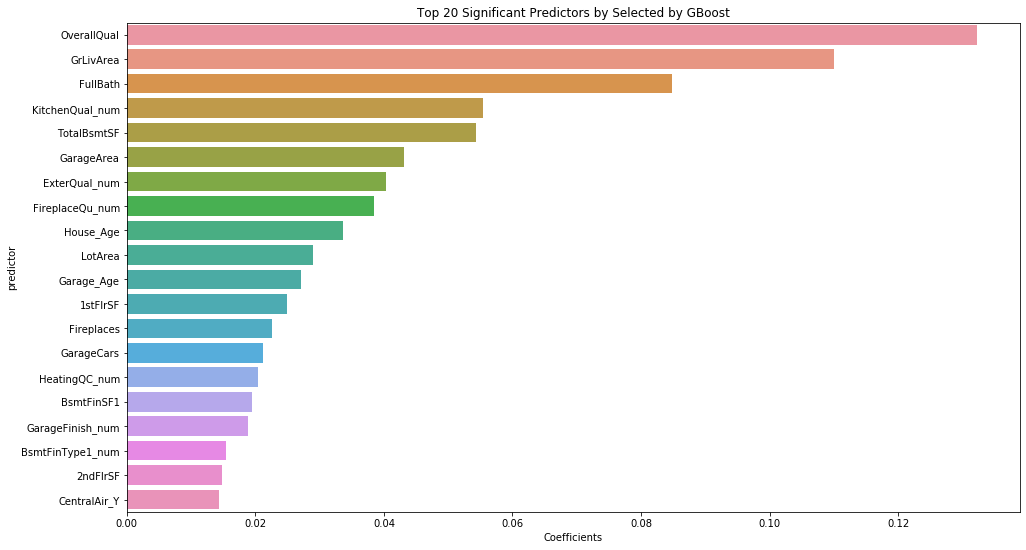

In [254]:
# plot of top significant coefficients
plot_df = gbm_feature_imp.head(20)
ax = sns.barplot(y = plot_df.predictor, x = "importance", data = plot_df)
ax.set(xlabel = "Coefficients", title = "Top 20 Significant Predictors by Selected by GBoost")
#plt.savefig("../output/lasso_coef_imp_top20.png", bbox_inches = "tight")

## 4. XGB

In [255]:
import xgboost as xgb

model_xgb = xgb.XGBRegressor(colsample_bytree=0.4, gamma=0.0, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7, n_estimators=6000,
                             reg_alpha=.9, reg_lambda=0.5,
                             subsample=0.75, silent=1,
                             random_state =42, nthread = -1)

In [256]:
model_xgb.fit(x_train, y_train)
xgb_pred_train = model_xgb.predict(x_train)
MSE = np.sqrt(-mean_squared_error(y_train, xgb_pred_train))
print(f"RMSE is {RMSE}")
print("train score is", round(model_rf.score(x_train, y_train), ndigits = 4))
print("oob score is", round(model_rf.oob_score_, ndigits = 4))

[16:31:03] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


RMSE is 0.1201
train score is 0.9067
oob score is 0.8634


In [258]:
xgb_score = np.sqrt(-cross_val_score(model_xgb, x_train, y_train, scoring = 'neg_mean_squared_error', cv = kf).mean())
print("validation RMSE: ", round(xgb_score, ndigits = 4))
xgb_score_r2 = cross_val_score(model_xgb, x_train, y_train, cv = kf).mean()
print("validation R2: ", round(xgb_score_r2, ndigits = 4))

[16:34:06] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[16:34:22] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[16:34:39] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through t

In [259]:
sorted_importance = sorted(zip(x_train.columns, model_xgb.feature_importances_), key=lambda t:t[1], reverse=True)
xgb_feature_imp = pd.DataFrame(sorted_importance, columns = ["predictor", "importance"]).sort_values(by = "importance", ascending=False)
#rf_feature_imp.to_csv("../output/rf_feature_imp.csv")
display(xgb_feature_imp)

,predictor,importance
0,OverallQual,0.10
1,GarageCars,0.06
2,Heating_Grav,0.06
3,GarageFinish_num,0.05
4,KitchenQual_num,0.04
5,GarageCond_num,0.04
6,GrLivArea,0.03
7,Fireplaces,0.03
8,RoofMatl_WdShake,0.03
9,ExterQual_num,0.02


[Text(0.5, 0, 'Coefficients'),
 Text(0.5, 1.0, 'Top 20 Significant Predictors by Selected by XGBoost')]

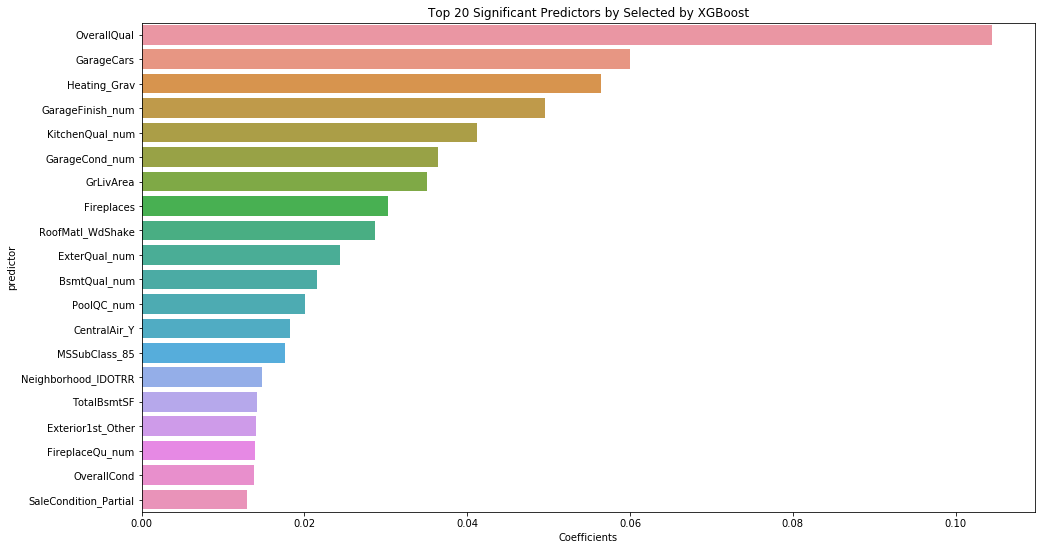

In [260]:
# plot of top significant coefficients
plot_df = xgb_feature_imp.head(20)
ax = sns.barplot(y = plot_df.predictor, x = "importance", data = plot_df)
ax.set(xlabel = "Coefficients", title = "Top 20 Significant Predictors by Selected by XGBoost")
#plt.savefig("../output/lasso_coef_imp_top20.png", bbox_inches = "tight")

## 5. Stacking

In [261]:
from mlxtend.regressor import StackingCVRegressor
stackcv = StackingCVRegressor(regressors=(model_lasso, model_rf, GBoost, model_xgb
                                          ),
                              meta_regressor=model_xgb,
                              use_features_in_secondary=True)

In [262]:
stackcv_fit = stackcv.fit(x_train, y_train)

[16:38:02] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[16:38:17] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[16:38:32] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through t

In [263]:
stack_score = np.sqrt(-cross_val_score(stackcv_fit, x_train.values, y_train, scoring = 'neg_mean_squared_error', cv = kf).mean())
print("validation RMSE: ", round(stack_score, ndigits = 4))
stack_score_r2 = cross_val_score(stackcv_fit, x_train.values, y_train, cv = kf).mean()
print("validation R2: ", round(stack_score_r2, ndigits = 4))

[16:40:49] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[16:41:00] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[16:41:11] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through t

[16:48:44] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[16:48:57] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[16:49:10] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through t

[16:57:01] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[16:57:32] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[16:58:39] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through t

In [ ]:
# Lmse2 = []
# r2df = []
# for i in range(5):
#     xtrain, xtest, ytrain, ytest = train_test_split(x_train, y_train, 
#                                                        test_size=1.0/5, random_state=i)
#     stackcv.fit(xtrain.values, ytrain)
#     #rmse = np.sqrt(np.mean((stackcv.predict(xtest.values)-ytest)**2))
#     rmse = round(np.sqrt(mean_squared_error(stackcv.predict(xtest.values), ytest)), ndigits = 4) 
#     r2= stackcv.score(xtest.values, ytest)
#     Lmse2.append(rmse)
#     r2df.append(r2df)
# print(np.mean(Lmse2))
# print(np.mean(r2df))

[05:30:56] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[05:31:10] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[05:31:24] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through t

[05:39:29] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[05:39:42] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[05:40:01] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through t

In [50]:
# print('The Final Stack RSME:',round(np.mean(Lmse2),4))
# print('The Final Stack RSME Std:',round(np.std(Lmse2),5))
# print('The Final Stack R2:',round(np.mean(r2df),5))

The Final Stack RSME: 0.1278
The Final Stack RSME Std: 0.02323


## Final Predictions

In [269]:
#model_rf.fit(x_train, y_train)
Price_predict = stackcv_fit.predict(test.values)
predict = pd.DataFrame({'Id':range(1461,2920),
                            'SalePrice': np.exp(Price_predict)})
predict.to_csv('stack_predict_stack.csv',index=False)
predict.head()

,Id,SalePrice
0,1461,124850.57
1,1462,167223.77
2,1463,178027.62
3,1464,200173.67
4,1465,176953.12


## Final Model Results

In [270]:
print('Model scoring based on cross-validation\n')
print(f'{"Model":<20}{"RMSE mean":>12}{"R2 mean":>12}\n')

print(f'{"1. Lasso":<20}{lasso_score:>12.4f}{lasso_score_r2:>12.4f}')

print(f'{"2. Random Forest":<20}{rf_score:>12.4f}{rf_score_r2:>12.4f}')

print(f'{"3. Gradient Boost":<20}{gbm_score:>12.4f}{gbm_score_r2:>12.4f}')

print(f'{"4. XGBoost":<20}{xgb_score:>12.4f}{xgb_score_r2:>12.4f}')

print(f'{"5. Model Stack":<20}{stack_score:>12.4f}{stack_score_r2:>12.4f}')

# score = xval_rmse_scoring(xgboost, X_train, y_train, kfolds)
# print(f'{"6. XGBoost":<20}{score.mean():>12.4f}{score.std():>12.4f}')

Model scoring based on cross-validation

Model                  RMSE mean     R2 mean

1. Lasso                  0.1451      0.8677
2. Random Forest          0.1488      0.8677
3. Gradient Boost         0.1264      0.9002
4. XGBoost                0.1247      0.9024
5. Model Stack            0.1236      0.9009


Text(0.5, 1.0, 'KitchenQual_num vs SalePrice')

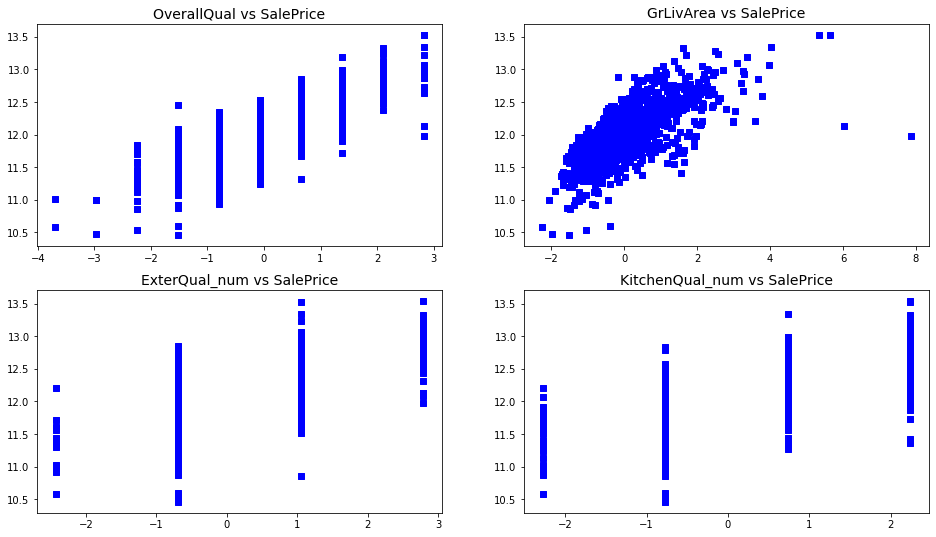

In [271]:
x = rf_feature_imp.predictor[0:5]

fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2)

ax1.scatter(x_train[x[0]], y_train, c = "blue", marker = "s") 
ax1.set_title(f"{x[0]} vs SalePrice",size=14)
ax2.scatter(x_train[x[1]], y_train, c = "blue", marker = "s")
ax2.set_title(f"{x[1]} vs SalePrice",size=14)
ax3.scatter(x_train[x[2]], y_train, c = "blue", marker = "s") 
ax3.set_title(f"{x[2]} vs SalePrice",size=14)
ax4.scatter(x_train[x[3]], y_train, c = "blue", marker = "s") 
ax4.set_title(f"{x[3]} vs SalePrice",size=14)


Text(0.5, 1.0, 'KitchenQual_num vs SalePrice')

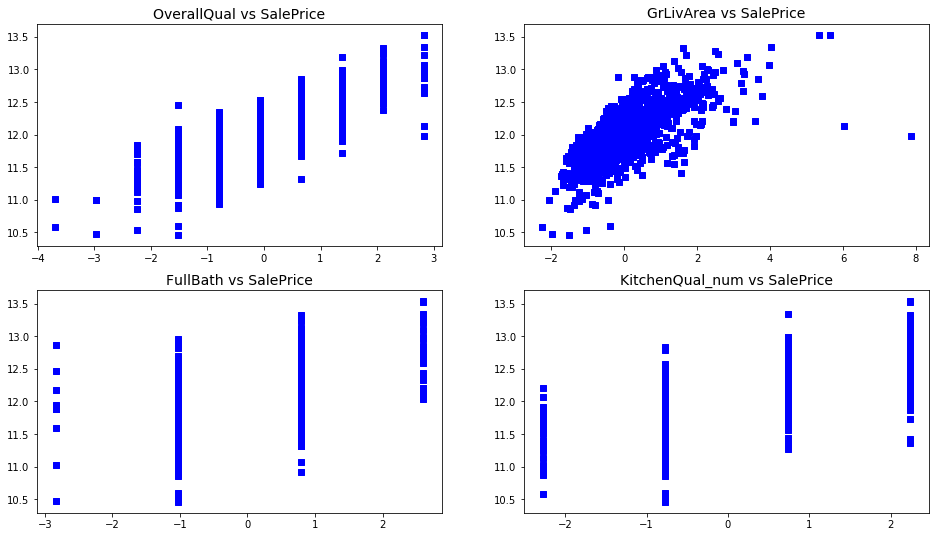

In [272]:
x = gbm_feature_imp.predictor[0:5]

fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2)

ax1.scatter(x_train[x[0]], y_train, c = "blue", marker = "s") 
ax1.set_title(f"{x[0]} vs SalePrice",size=14)
ax2.scatter(x_train[x[1]], y_train, c = "blue", marker = "s")
ax2.set_title(f"{x[1]} vs SalePrice",size=14)
ax3.scatter(x_train[x[2]], y_train, c = "blue", marker = "s") 
ax3.set_title(f"{x[2]} vs SalePrice",size=14)
ax4.scatter(x_train[x[3]], y_train, c = "blue", marker = "s") 
ax4.set_title(f"{x[3]} vs SalePrice",size=14)



Text(0.5, 1.0, 'GarageFinish_num vs SalePrice')

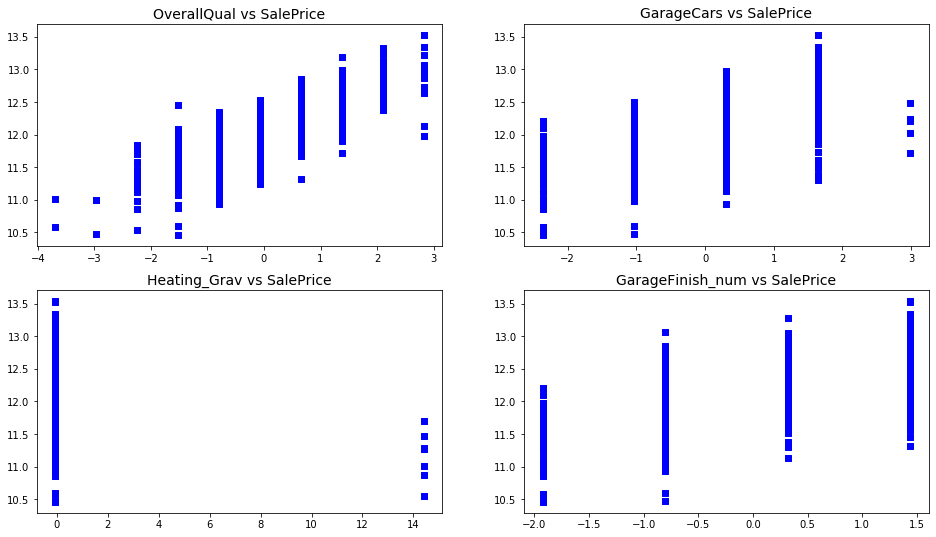

In [273]:
x = xgb_feature_imp.predictor[0:5]

fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2)

ax1.scatter(x_train[x[0]], y_train, c = "blue", marker = "s") 
ax1.set_title(f"{x[0]} vs SalePrice",size=14)
ax2.scatter(x_train[x[1]], y_train, c = "blue", marker = "s")
ax2.set_title(f"{x[1]} vs SalePrice",size=14)
ax3.scatter(x_train[x[2]], y_train, c = "blue", marker = "s") 
ax3.set_title(f"{x[2]} vs SalePrice",size=14)
ax4.scatter(x_train[x[3]], y_train, c = "blue", marker = "s") 
ax4.set_title(f"{x[3]} vs SalePrice",size=14)

